In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# *Dataset Upload*

In [3]:
columnname = pd.read_excel("features.xlsx")
column = columnname["degiskenismi"]

In [4]:
x_train = pd.read_excel("x_train.xlsx", names = column)
x_test = pd.read_excel("x_test.xlsx", names = column)
y_train = pd.read_excel("y_train.xlsx", names = ["activity"]) -1
y_test = pd.read_excel("y_test.xlsx", names = ["activity"]) -1

# *Dataset Overview*

In [5]:
x_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [6]:
x_train.shape

(7351, 561)

In [7]:
x_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471


In [8]:
x_test.shape

(2946, 561)

In [9]:
y_train.head()

,activity
0,4
1,4
2,4
3,4
4,4


In [10]:
y_train.shape

(7351, 1)

In [ ]:
activity = y_train.value_counts()
activity

In [66]:
activity.index = (["LAYING","STANDING","SITTING","WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS"])

In [67]:
activity

LAYING                1407
STANDING              1373
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
dtype: int64

<AxesSubplot:>

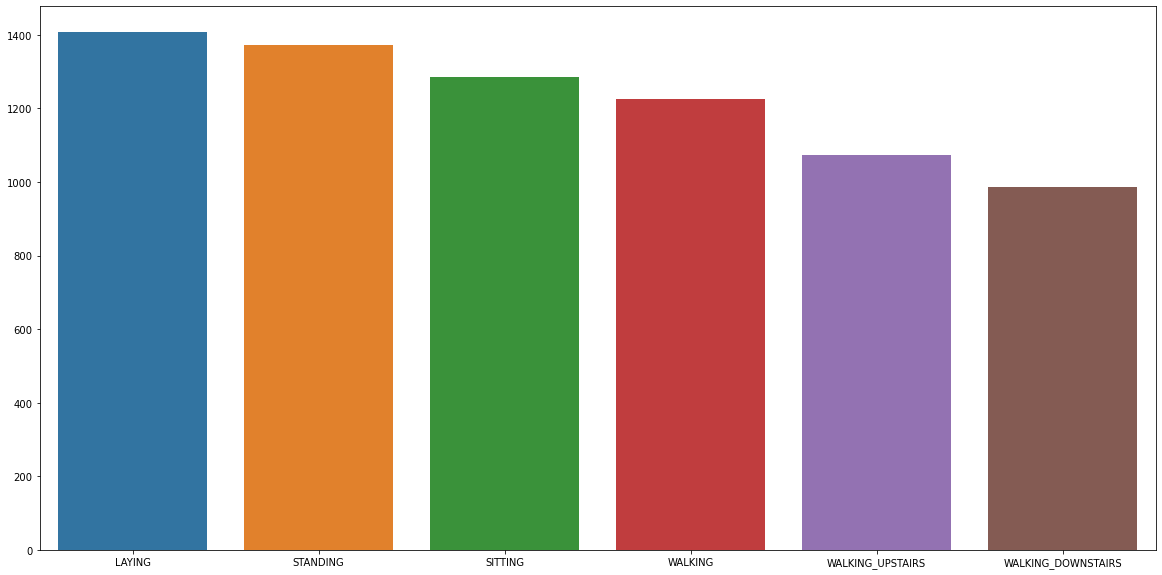

In [72]:
plt.figure(figsize =(20,10))
sns.barplot(x = activity.index, y = activity.values)

In [75]:
from collections import Counter
from cycler import cycler
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in x_train.columns]), 
                       orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyGyro,79
fBodyAcc,79
fBodyAccJerk,79
tBodyAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tGravityAcc,40
fBodyBodyGyroJerkMag,13
fBodyBodyGyroMag,13


#### *2 sensors, gyroscope (Gyro) and accelerometer(Acc) , were used in the data set.*

# *Setting Up Models*

In [100]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [07:11<00:00, 14.87s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.97,0.97,None,0.97,35.14
LinearSVC,0.96,0.96,None,0.96,9.60
LinearDiscriminantAnalysis,0.96,0.96,None,0.96,1.73
RidgeClassifier,0.96,0.96,None,0.96,0.71
RidgeClassifierCV,0.96,0.96,None,0.96,1.81
Perceptron,0.95,0.95,None,0.95,1.86
LogisticRegression,0.95,0.95,None,0.95,3.24
SVC,0.95,0.95,None,0.95,14.51
PassiveAggressiveClassifier,0.95,0.95,None,0.95,2.59


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

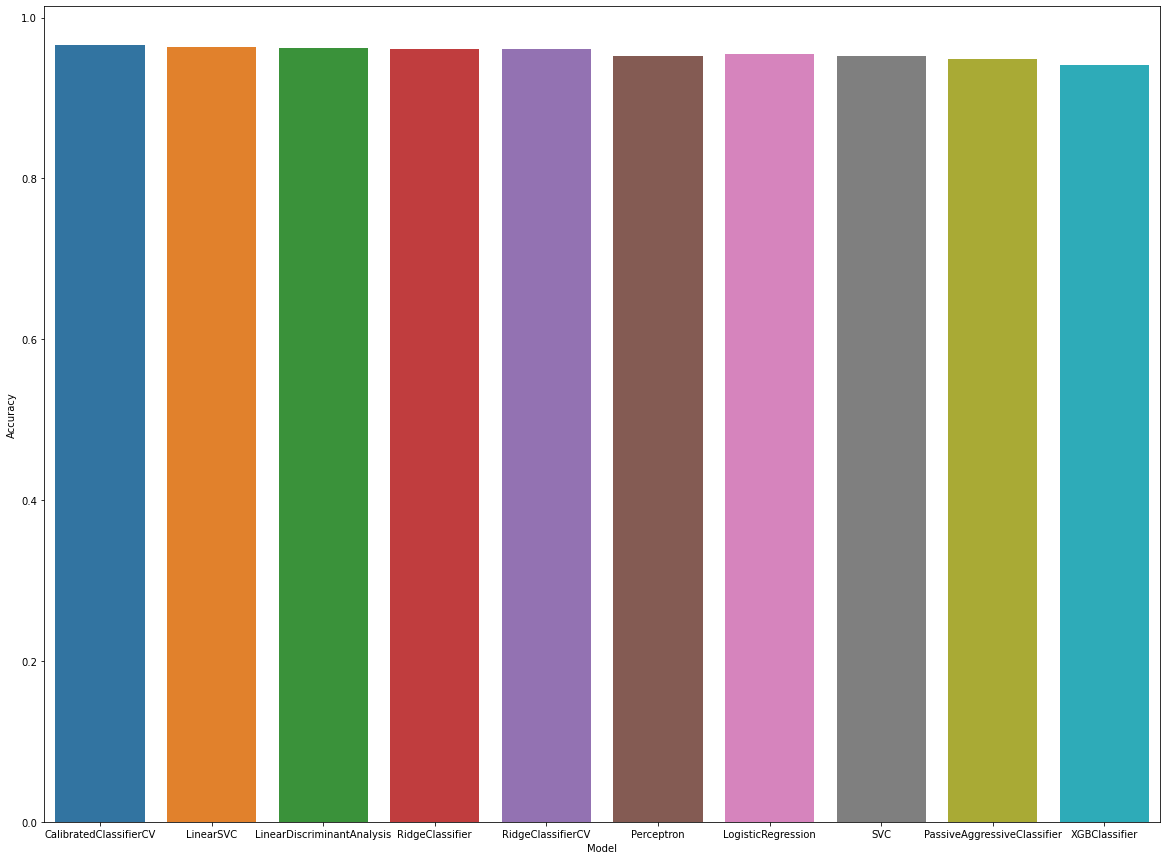

In [163]:
models_accuracy = pd.DataFrame(models.Accuracy)[0:10]
plt.figure(figsize =(20,15))
sns.barplot(x = models_accuracy.index, y = models_accuracy["Accuracy"])

## *REMOVING THE ACCELEROMETER SENSOR FROM THE DATASET*

In [170]:
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

In [171]:
for var_name in x_train_copy.columns:
    if 'Acc' in var_name:
        del x_train_copy[var_name]

In [172]:
x_train_copy.shape

(7351, 216)

In [173]:
for var_name in x_test_copy.columns:
    if 'Acc' in var_name:
        del x_test_copy[var_name]

In [191]:
x_test_copy.shape

(2946, 216)

In [175]:
x_train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.28,-0.02,-0.12,-1.00,-0.98,-0.96,-1.00,-0.97,-0.96,-0.94,...,0.16,-0.60,-0.86,0.05,-0.01,-0.73,0.70,-0.84,0.18,-0.05
1,0.28,-0.02,-0.11,-1.00,-0.97,-0.98,-1.00,-0.96,-0.98,-0.94,...,0.41,-0.39,-0.76,-0.12,0.18,0.10,0.81,-0.85,0.18,-0.05
2,0.28,-0.03,-0.12,-1.00,-0.98,-0.99,-1.00,-0.98,-0.99,-0.94,...,0.40,-0.12,-0.48,-0.04,-0.01,0.64,-0.49,-0.85,0.18,-0.05
3,0.28,-0.02,-0.12,-1.00,-0.98,-0.99,-1.00,-0.98,-0.99,-0.94,...,0.09,-0.35,-0.70,0.12,0.12,0.69,-0.62,-0.85,0.19,-0.04
4,0.28,-0.01,-0.11,-1.00,-0.99,-1.00,-1.00,-0.99,-1.00,-0.94,...,0.02,-0.55,-0.84,0.08,-0.14,0.28,-0.37,-0.85,0.18,-0.04
5,0.28,-0.02,-0.11,-1.00,-0.97,-0.98,-1.00,-0.97,-0.98,-0.94,...,0.15,-0.22,-0.56,-0.21,-0.23,0.01,-0.19,-0.85,0.18,-0.04
6,0.28,-0.03,-0.13,-1.00,-0.97,-0.98,-1.00,-0.97,-0.98,-0.94,...,0.14,-0.08,-0.42,-0.02,0.59,-0.56,0.47,-0.85,0.18,-0.04
7,0.28,-0.02,-0.12,-1.00,-0.96,-0.98,-1.00,-0.96,-0.98,-0.94,...,0.31,-0.27,-0.57,0.01,0.08,-0.23,0.12,-0.85,0.19,-0.04
8,0.28,-0.01,-0.11,-0.99,-0.97,-0.99,-1.00,-0.97,-0.99,-0.94,...,0.27,0.34,0.14,-0.02,-0.13,-0.48,-0.07,-0.85,0.19,-0.03
9,0.28,-0.01,-0.10,-0.99,-0.97,-0.99,-1.00,-0.97,-0.99,-0.94,...,0.12,0.35,0.06,0.08,0.60,-0.48,0.12,-0.85,0.19,-0.03


In [189]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in x_train_copy.columns]), 
                       orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyGyro,79
tBodyGyro,40
tBodyGyroJerk,40
tBodyGyroMag,13
tBodyGyroJerkMag,13
fBodyBodyGyroMag,13
fBodyBodyGyroJerkMag,13
angle,5


In [176]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_copy, x_test_copy, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:52<00:00,  5.94s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.92,0.92,None,0.92,15.32
PassiveAggressiveClassifier,0.92,0.92,None,0.92,1.27
LinearDiscriminantAnalysis,0.92,0.91,None,0.92,0.65
LinearSVC,0.92,0.91,None,0.92,3.76
RidgeClassifier,0.91,0.91,None,0.91,0.28
RidgeClassifierCV,0.91,0.91,None,0.91,0.47
RandomForestClassifier,0.91,0.90,None,0.91,11.30
LogisticRegression,0.91,0.90,None,0.91,1.07
Perceptron,0.90,0.90,None,0.90,0.71


### *A slight decrease in the success rates of the models is observed after the accelerometer sensor is removed from the dataset.*

## *REMOVING THE GYROSCOPE SENSOR FROM THE DATASET*

In [182]:
x_train_copy_2 = x_train.copy()
x_test_copy_2 = x_test.copy()

In [183]:
x_train_copy_2.shape

(7351, 561)

In [184]:
for var_name in x_train_copy_2.columns:
    if 'Gyro' in var_name:
        del x_train_copy_2[var_name]

In [185]:
x_train_copy_2.shape

(7351, 348)

In [186]:
for var_name in x_test_copy_2.columns:
    if 'Gyro' in var_name:
        del x_test_copy_2[var_name]

In [187]:
x_test_copy_2.shape

(2946, 348)

In [188]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in x_train_copy_2.columns]), 
                       orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyAccJerk,79
tBodyAcc,40
tGravityAcc,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13
tBodyAccJerkMag,13
fBodyAccMag,13
fBodyBodyAccJerkMag,13


In [192]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_copy_2, x_test_copy_2, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [03:50<00:00,  7.96s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.91,0.91,None,0.91,24.47
LinearSVC,0.91,0.91,None,0.91,6.25
LogisticRegression,0.91,0.90,None,0.90,1.70
SVC,0.91,0.90,None,0.91,8.98
SGDClassifier,0.90,0.90,None,0.90,1.94
LinearDiscriminantAnalysis,0.90,0.90,None,0.90,0.88
PassiveAggressiveClassifier,0.90,0.90,None,0.90,1.22
RidgeClassifierCV,0.90,0.90,None,0.90,0.91
XGBClassifier,0.90,0.90,None,0.90,61.55


### *A slight decrease in the success rates of the models is observed after the gyroscope sensor is removed from the dataset.*